In [31]:
#Basics
import seaborn as sns

#System
import sys

#imports models
from sklearn.ensemble import RandomForestClassifier

In [3]:
# #define path if pkg is not install
# a = !pwd
# path = ("/").join(list(a)[0].split("/")[:-1])

# sys.path.append(path)

In [32]:
from ml_pinguins_pkg.pinguins_ml import Pinguins_ml
from ml_pinguins_pkg.pinguins_viz import Pinguins_viz
from ml_pinguins_pkg.pinguins_model import Pinguins_model

In [33]:
df = sns.load_dataset('penguins')


In [47]:
df[:300]



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,Male
296,Gentoo,Biscoe,47.5,14.2,209.0,4600.0,Female
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


['Nombre de lignes : 344 lignes',
 'Nombre de colonnes : 7 colonnes',
 'Nombre total de celulles non nulles : 2389',
 'Nombre total de cellules nulles : 19']

,name,type,sample,% nulls
species,species,object,"['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel...",0.0
island,island,object,"['Torgersen', 'Torgersen', 'Torgersen', 'Torge...",0.0
bill_length_mm,bill_length_mm,float64,"[39.1, 39.5, 40.3, nan, 36.7]",1.0
bill_depth_mm,bill_depth_mm,float64,"[18.7, 17.4, 18.0, nan, 19.3]",1.0
flipper_length_mm,flipper_length_mm,float64,"[181.0, 186.0, 195.0, nan, 193.0]",1.0
body_mass_g,body_mass_g,float64,"[3750.0, 3800.0, 3250.0, nan, 3450.0]",1.0
sex,sex,object,"['Male', 'Female', 'Female', nan, 'Female']",3.0


count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

/Users/baguidou/opt/anaconda3/envs/ml_pinguins_env/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


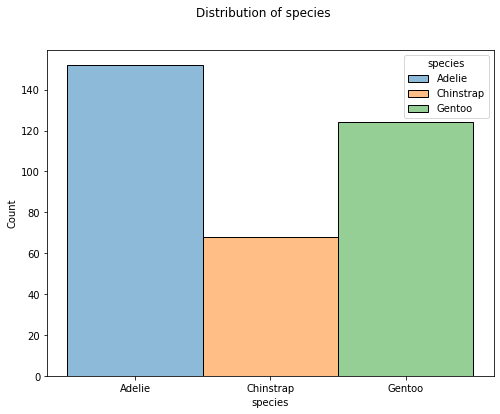

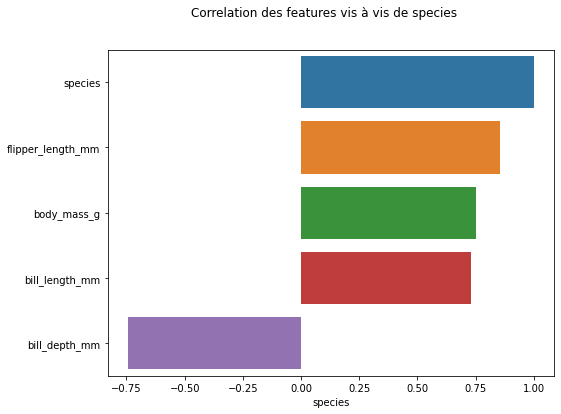

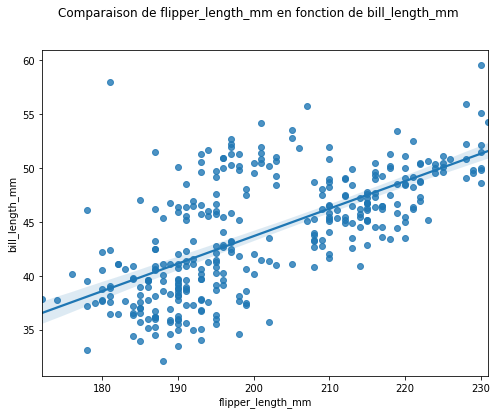

In [48]:
viz = Pinguins_viz(df,'species')
viz.infos()
a = viz.look('species')
b = viz.korr('species')
a = viz.kompare('flipper_length_mm', 'bill_length_mm')

In [49]:
model = Pinguins_model(df,'species')

['accuracy : 1.0',
 'precision : [1. 1. 1.]',
 'recall : [1. 1. 1.]',
 'f1 : [1. 1. 1.]']

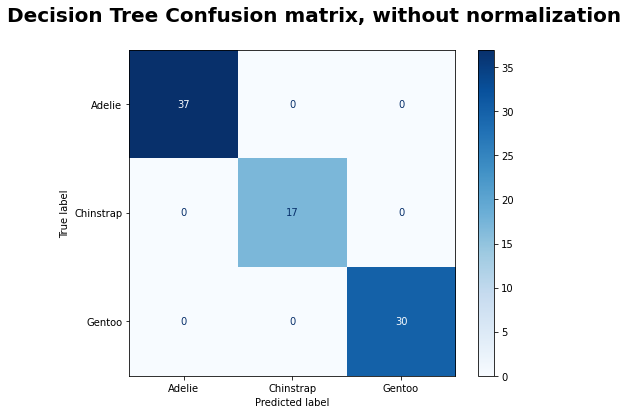

In [50]:
model.evaluate_model(RandomForestClassifier())

In [51]:
model.prepare_model(RandomForestClassifier())

In [52]:
model.model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['island', 'sex'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [53]:
test = df[:1].copy()
model.transform_null(test)

In [54]:
model.y.unique()

array(['Adelie'], dtype=object)

In [55]:
pred = model.predict_model(model.model, model.X)
pred

array(['Adelie'], dtype=object)

In [56]:
model.show_classification_scores(model.y, pred)

['accuracy : 1.0', 'precision : [1.]', 'recall : [1.]', 'f1 : [1.]']

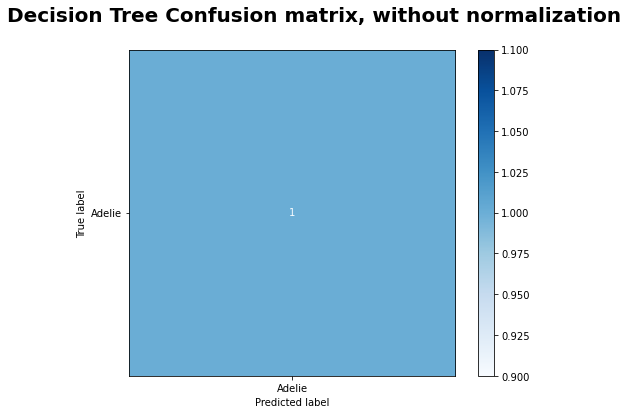

In [57]:
a = model.matrix_plot(model.model, model.X, model.y)